In [1]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import numpy as np
import os
import cv2
import imutils
import time
import uuid
import random
from scipy import ndimage
from PIL import Image
from math import floor, ceil, pi
from glob import glob

In [2]:
def get_image_paths(folder):
    files = os.listdir(folder)
    files.sort()
    files = ['{}/{}'.format(folder, file) for file in files]
    return files

In [8]:
imgs_background = get_image_paths('/home/apofeo/Documents/testSet_full')
imgs_logos = get_image_paths('/home/apofeo/Documents/car_logos/')

In [4]:
imgs_logos = [y for x in os.walk('/home/apofeo/Documents/car_logos/') for y in glob(os.path.join(x[0], "*.jpg"))]
imgs_logos.sort()

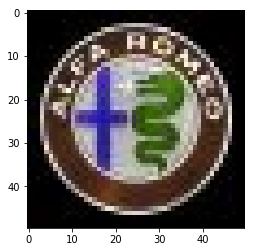

In [5]:
logo = cv2.imread(imgs_logos[0])
plt.imshow(logo)

In [35]:
IMG_SIZE = 500

In [43]:
s_img = cv2.imread(imgs_logos[1])
s_img = cv2.cvtColor(s_img, cv2.COLOR_RGB2RGBA)
# s_img = cv2.resize(s_img, (IMG_SIZE, IMG_SIZE))
s_img = ndimage.rotate(s_img, 135, reshape=True)
l_img = cv2.imread(imgs_background[29189])
l_img = cv2.resize(l_img, (IMG_SIZE, IMG_SIZE))
y_offset, x_offset = random.randint(0, 350), random.randint(0, 350)
# x_offset=s_img.shape[0]//6
# y_offset=s_img.shape[1]//6
# s_img = cv2.imread("smaller_image.png", -1)

# cv2.imshow('l_img', l_img)
# cv2.waitKey(0)
# # [display]
# cv2.destroyAllWindows()

y1, y2 = y_offset, y_offset + s_img.shape[0]
x1, x2 = x_offset, x_offset + s_img.shape[1]

alpha_s = s_img[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
    l_img[y1:y2, x1:x2, c] = (alpha_s * s_img[:, :, c] +
                              alpha_l * l_img[y1:y2, x1:x2, c])

cv2.imshow('l_img', l_img)
cv2.waitKey(0)
# [display]
cv2.destroyAllWindows()

In [6]:
import numpy as np
import cv2
def add_gaussian_noise(img, mean, var):
    img = img
    mean = mean
    var = var
    sigma = var ** 0.5
    gaussian = np.random.normal(mean, sigma, (img.shape[0],img.shape[1]))

    noisy_image = np.zeros(img.shape, np.float32)

    if len(img.shape) == 2:
        noisy_image = img + gaussian
    else:
        noisy_image[:, :, 0] = img[:, :, 0] + gaussian
        noisy_image[:, :, 1] = img[:, :, 1] + gaussian
        noisy_image[:, :, 2] = img[:, :, 2] + gaussian

    cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

# cv2.imshow('l_img', add_gaussian_noise(l_img,50,500))
# cv2.waitKey(0)
# # [display]
# cv2.destroyAllWindows()

#### Version 1

In [9]:
start = time.time()
idx = 0
IMG_SIZE = 300
for each_logo_folder in imgs_logos:
    for each_img in get_image_paths(each_logo_folder)[:20]:
        idx +=1
        img_clp = cv2.imread(each_img)
        img_clp = cv2.cvtColor(img_clp, cv2.COLOR_RGB2RGBA)
        
        background_index = random.randrange(0,41000,1)
        x_offset = random.randint(0,150)
        y_offset = random.randint(0,150)
        noise_var = random.randrange(100,700,20)
        filename = uuid.uuid4().hex
        
        img_background = cv2.imread(imgs_background[background_index])
        img_background = cv2.resize(img_background, (IMG_SIZE, IMG_SIZE))
        
        y1, y2 = y_offset, y_offset + img_clp.shape[0]
        x1, x2 = x_offset, x_offset + img_clp.shape[1]
        
        alpha_s = img_clp[:, :, 3] / 255.0
        alpha_l = 1.0 - alpha_s
        
        try:
            for c in range(0, 3):
                img_background[y1:y2, x1:x2, c] = (alpha_s * img_clp[:, :, c] +
                                      alpha_l * img_background[y1:y2, x1:x2, c])
        except Exception:
            print(f'background_index = {background_index}, angle = {i}, idx = {idx}')
        
#         img_background[y_offset:y_offset+rotated.shape[0], x_offset:x_offset+rotated.shape[1]] = rotated
        img_backgr_noise = add_gaussian_noise(img_background,50,noise_var)
        if not os.path.exists(f'/home/apofeo/Documents/car_logos_detect_imgs'):
            os.makedirs(f'/home/apofeo/Documents/car_logos_detect_imgs')
        cv2.imwrite(f'/home/apofeo/Documents/car_logos_detect_imgs/cldi_{idx}.png', img_backgr_noise)

end = time.time()
print(end - start)

48.27859330177307
